In [1]:
import sklearn
import pandas as pd
import numpy as np
print(sklearn.__version__)
import lightgbm as lgb
print(lgb.__version__)
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, matthews_corrcoef

0.23.2
2.2.3


In [2]:
df = pd.read_csv("ECs_presence_absence.csv")
df.shape
df

,Genome,ECs_0002,ECs_0003,ECs_0004,ECs_0005,ECs_0006,ECs_0007,ECs_0008,ECs_0009,ECs_0010,...,ECs_5772,ECs_5773,ECs_5774,ECs_5775,ECs_5776,ECs_5777,ECs_5779,ECs_5780,ECs_5781,EHEC
0,06QMA126-1-unicyclerassembly,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,0,0
1,06QMA140-2-unicycler-assembly,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,0
2,06QMA181-1a-Unicycler-assembly,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,0,0
3,06QMA227-3-Unicycler-assembly,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,0,0
4,07HMPA386-Unicycler-assembly,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,NC809-Unicycler-assembly,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,0,0
1489,NV34-Unicycler-assembly,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
1490,NV36-unicycler-50x-assembly,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,0,1,0,0
1491,Slk8430761-flye-racon-medaka-consensus,1,1,0,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,1,1


In [3]:
X = df.drop(['Genome','EHEC'], axis=1)
y = df['EHEC']
X.head()

,ECs_0002,ECs_0003,ECs_0004,ECs_0005,ECs_0006,ECs_0007,ECs_0008,ECs_0009,ECs_0010,ECs_0012,...,ECs_5771,ECs_5772,ECs_5773,ECs_5774,ECs_5775,ECs_5776,ECs_5777,ECs_5779,ECs_5780,ECs_5781
0,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0


In [4]:
y.value_counts()

0    861
1    632
Name: EHEC, dtype: int64

In [5]:
def variance_threshold_selector(data, threshold=0.1):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]
X = variance_threshold_selector(X, 0.1)
X.head(5)

,ECs_0023,ECs_0024,ECs_0025,ECs_0052,ECs_0053,ECs_0061,ECs_0073,ECs_0146,ECs_0217,ECs_0218,...,ECs_5738,ECs_5740,ECs_5741,ECs_5742,ECs_5743,ECs_5764,ECs_5766,ECs_5773,ECs_5779,ECs_5781
0,0,0,1,1,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,0,0
1,1,1,1,1,1,1,1,1,0,1,...,1,0,0,0,0,1,0,1,1,0
2,0,0,1,1,1,0,0,1,1,1,...,1,1,1,0,0,1,1,1,0,0
3,0,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,1,1,1,0,0
4,0,0,1,1,1,0,0,1,1,1,...,0,0,1,0,1,1,1,1,0,0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2)

In [7]:
X_train.shape
y_train.value_counts()

0    689
1    505
Name: EHEC, dtype: int64

In [8]:
X_test.shape
y_test.value_counts()

0    172
1    127
Name: EHEC, dtype: int64

In [9]:
X_train

,ECs_0023,ECs_0024,ECs_0025,ECs_0052,ECs_0053,ECs_0061,ECs_0073,ECs_0146,ECs_0217,ECs_0218,...,ECs_5738,ECs_5740,ECs_5741,ECs_5742,ECs_5743,ECs_5764,ECs_5766,ECs_5773,ECs_5779,ECs_5781
1376,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
382,0,0,1,0,0,0,0,1,0,1,...,0,1,0,0,0,1,1,1,0,0
1367,0,0,1,0,0,0,0,1,1,1,...,0,0,0,0,0,1,1,1,0,0
294,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,1,1,1,1
366,0,0,1,0,0,0,0,1,1,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
128,0,0,1,1,1,0,0,1,1,1,...,0,0,1,0,1,1,1,1,0,0
1336,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,1,0
1473,0,0,1,0,0,0,0,1,1,1,...,1,0,1,1,1,1,1,1,1,0


In [10]:
fit_params={"early_stopping_rounds":100, 
            "eval_metric" : 'binary_error', 
            "eval_set" : [(X_test,y_test), (X_train, y_train)],
            'eval_names': ['test', 'train'],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [11]:
clf = lgb.LGBMClassifier(objective = 'binary', random_state=314, silent=True, n_jobs=-1, n_estimators=1000, metric='None')

In [12]:
clf.fit(X_train, y_train, **fit_params)

Training until validation scores don't improve for 100 rounds.
[100]	train's binary_error: 0	test's binary_error: 0
Early stopping, best iteration is:
[24]	train's binary_error: 0.00167504	test's binary_error: 0


LGBMClassifier(metric='None', n_estimators=1000, objective='binary',
               random_state=314)

In [13]:
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)

print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('ROC_AUC : {0:0.4f}'.format(roc_auc_score(y_test, y_pred)))

LightGBM Model accuracy score: 1.0000
ROC_AUC : 1.0000


Plotting feature importances...


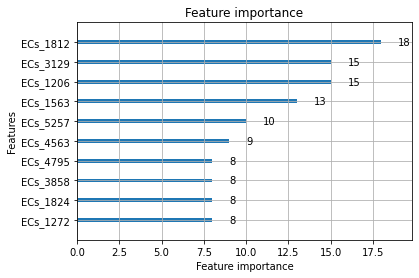

In [14]:
print('Plotting feature importances...')
ax = lgb.plot_importance(clf, max_num_features=10)
plt.show()

In [15]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print(classification_report(y_test, y_pred))
print('- MCC: %s' % matthews_corrcoef(y_test, y_pred))

Confusion matrix

 [[172   0]
 [  0 127]]

True Positives(TP) =  172

True Negatives(TN) =  127

False Positives(FP) =  0

False Negatives(FN) =  0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00       127

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299

- MCC: 1.0


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

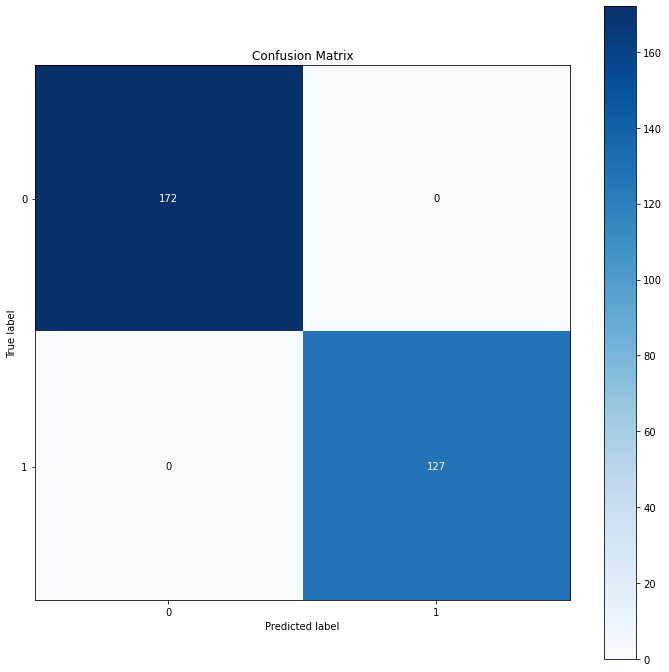

In [16]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12))

In [17]:
clf.booster_.save_model("Model_A.txt")

In [18]:
f=open('list_of_features_model_A.txt','w')
for ele in X.columns:
    f.write(ele+'\n')
f.close()

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_error'>

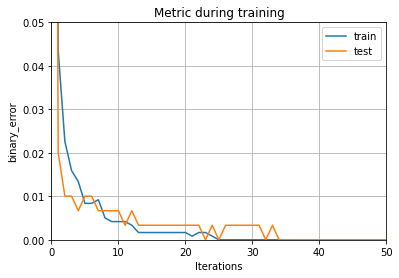

In [19]:
lgb.plot_metric(clf, xlim = (0,50), ylim = (0,0.05))

In [20]:
def get_lgbm_varimp(model, train_columns, max_vars=25):
    
    cv_varimp_df = pd.DataFrame([train_columns, model.feature_importances_]).T

    cv_varimp_df.columns = ['feature_name', 'varimp']

    cv_varimp_df.sort_values(by='varimp', ascending=False, inplace=True)

    cv_varimp_df = cv_varimp_df.iloc[0:max_vars]   

    return cv_varimp_df

df_var_imp = get_lgbm_varimp(clf, X.columns, max_vars=6)
print(df_var_imp.head(6))

     feature_name varimp
473      ECs_1812     18
791      ECs_3129     15
237      ECs_1206     15
382      ECs_1563     13
1125     ECs_5257     10
993      ECs_4563      9


In [21]:
features_list = list(df_var_imp['feature_name'])
features_list = ["Genome"] + features_list + ["EHEC"]
df2 = df[features_list]
print(df2.head(5))

                           Genome  ECs_1812  ECs_3129  ECs_1206  ECs_1563  \
0    06QMA126-1-unicyclerassembly         0         0         1         0   
1   06QMA140-2-unicycler-assembly         0         1         0         0   
2  06QMA181-1a-Unicycler-assembly         0         1         1         0   
3   06QMA227-3-Unicycler-assembly         0         1         1         0   
4    07HMPA386-Unicycler-assembly         0         0         1         0   

   ECs_5257  ECs_4563  EHEC  
0         0         0     0  
1         0         0     0  
2         0         0     0  
3         0         0     0  
4         0         0     0  


In [22]:
X2 = df2.drop(['Genome', "EHEC"], axis=1)
y2 = df2['EHEC']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y2, test_size=0.2, random_state=42)

In [23]:
fit_params2={"early_stopping_rounds":100, 
            "eval_metric" : 'binary_error', 
            "eval_set" : [(X2_test,y2_test), (X2_train, y2_train)],
            'eval_names': ['test', 'train'],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [24]:
clf2 = lgb.LGBMClassifier(objective = 'binary', random_state=314, silent=True, n_jobs=-1, n_estimators=1000, metric='None')
clf2.fit(X2_train, y2_train, **fit_params2)

Training until validation scores don't improve for 100 rounds.
[100]	train's binary_error: 0.0184255	test's binary_error: 0.00668896
Early stopping, best iteration is:
[44]	train's binary_error: 0.019263	test's binary_error: 0.00334448


LGBMClassifier(metric='None', n_estimators=1000, objective='binary',
               random_state=314)

In [25]:
y2_pred=clf2.predict(X2_test)
accuracy=accuracy_score(y2_pred, y2_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y2_test, y2_pred)))
y2_pred_train = clf2.predict(X2_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y2_train, y2_pred_train)))
print('ROC_AUC : {0:0.4f}'.format(roc_auc_score(y2_test, y2_pred)))
cm = confusion_matrix(y2_test, y2_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[1,1])
print('\nTrue Negatives(TN) = ', cm[0,0])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print(classification_report(y2_test, y2_pred))
print('- MCC: %s' % matthews_corrcoef(y2_test, y2_pred))

LightGBM Model accuracy score: 0.9967
Training-set accuracy score: 0.9807
ROC_AUC : 0.9961
Confusion matrix

 [[172   0]
 [  1 126]]

True Positives(TP) =  126

True Negatives(TN) =  172

False Positives(FP) =  0

False Negatives(FN) =  1
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       172
           1       1.00      0.99      1.00       127

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299

- MCC: 0.9931722670176888


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

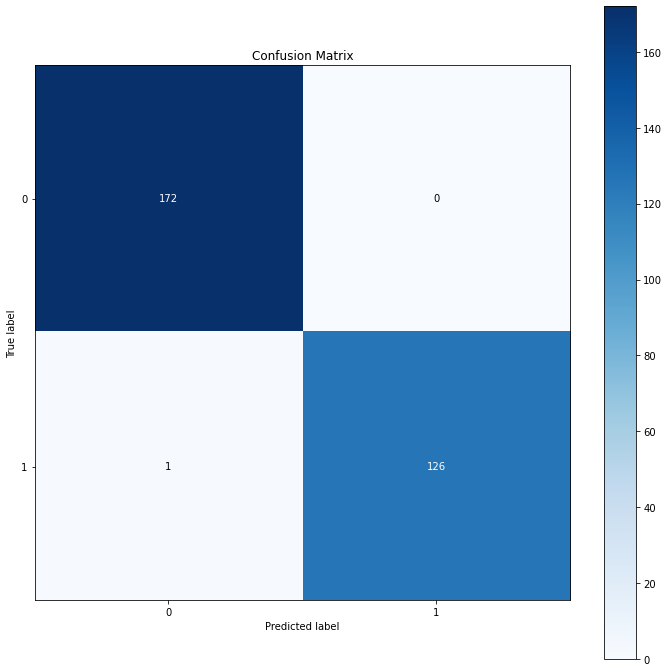

In [26]:
skplt.metrics.plot_confusion_matrix(
    y2_test,
    y2_pred,
    figsize=(12,12))

In [27]:
clf2.booster_.save_model("Model_B.txt")

In [28]:
f=open('list_of_features_model_B.txt','w')
for ele in X2.columns:
    f.write(ele+'\n')
f.close()

Plotting feature importances...


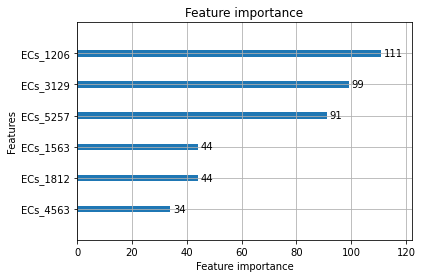

In [29]:
print('Plotting feature importances...')
ax = lgb.plot_importance(clf2, max_num_features=6)
plt.show()

In [30]:
fit_params3={"early_stopping_rounds":10, 
            "eval_metric" : 'binary_error', 
            "eval_set" : [(X_test,y_test), (X_train, y_train)],
            'eval_names': ['test', 'train'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_0995)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [31]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy.stats import loguniform as _loguniform
def loguniform(a, b):
    return _loguniform(10 ** a, 10 ** (a + b))

param_test ={'num_leaves': sp_randint(50, 150),
             'min_child_samples': sp_randint(10, 70), 
             'min_child_weight': loguniform(-2, 2),
             'subsample': sp_uniform(loc=0.3, scale=0.7), 
             'colsample_bytree': sp_uniform(loc=0.2, scale=0.6),
             'reg_alpha': loguniform(-6, 6),
             'reg_lambda': loguniform(-6, 6),
             'learning_rate' : loguniform(-4, 4)}

In [32]:
n_HP_points_to_test = 1000
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
clf3 = lgb.LGBMClassifier(objective = 'binary', max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=-1, n_estimators=1000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='f1',
    cv=5,
    refit=True,
    random_state=1,
    verbose=True)
gs.fit(X_train, y_train, **fit_params3)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.00334448	train's binary_error: 0.00753769


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00668896	train's binary_error: 0.0100503
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[17]	test's binary_error: 0.00668896	train's binary_error: 0.00335008
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.00334448	train's binary_error: 0.0117253
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00668896	train's binary_error: 0.00586265
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[9]	test's binary_error: 0	train's binary_error: 0
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0	train's binary_error: 0
Training until validation scores don't 

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.00668896	train's binary_error: 0
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[7]	test's binary_error: 0.00668896	train's binary_error: 0
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don'

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[23]	test's binary_error: 0	train's binary_error: 0.00335008
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	test's binary_error: 0.0100334	train's binary_error: 0.0318258
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[2]	test's binary_error: 0.0100334	train's binary_error: 0.0360134
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[23]	test's binary_error: 0	train's binary_error: 0.00167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[19]	test's binary_error: 0	train's binary_error: 0.000837521
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00334448	train's binary_error: 0.0100503
Training until validation scores

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[16]	test's binary_error: 0.00334448	train's binary_error: 0.0175879
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[14]	test's binary_error: 0.00334448	train's binary_error: 0.020938
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.00334448	train's binary_error: 0.0125628
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.00334448	train's binary_error: 0
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00334448	train's binary_error: 0.00502513
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0	train's binary_error: 0
Training until validation scor

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[7]	test's binary_error: 0.00334448	train's binary_error: 0.00167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00334448	train's binary_error: 0.00335008
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00334448	train's binary_error: 0.00251256
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	test's binary_error: 0.00334448	train's binary_error: 0.0184255
Training unti

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00334448	train's binary_error: 0.0175879
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.00334448	train's binary_error: 0.0108878
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.00668896	train's binary_error: 0.0125628
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.00334448	train's binary_error: 0.0125628
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.0100334	train's binary_error: 0.0125628
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[7]	test's binary_error: 0.0133779	train's binary_error: 0.0108878
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[7]	test's binary_error: 0	train's binary_error: 0
Training until validation 

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.0133779	train's binary_error: 0.0234506
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.0234114	train's binary_error: 0.0217755
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.0133779	train's binary_error: 0.0226131
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.0133779	train's binary_error: 0.0217755
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until val

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00668896	train's binary_error: 0.0184255
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.00334448	train's binary_error: 0.00921273
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.00334448	train's binary_error: 0.0134003
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until v

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0	train's binary_error: 0.00502513
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0	train's binary_error: 0.00502513
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0	train's binary_error: 0.00167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00334448	train's binary_error: 0.0117253
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0	train's binary_error: 0.00251256
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0	train's binary_error: 0.00251256
Training until validation scores don't improve

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.00334448	train's binary_error: 0.0167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[9]	test's binary_error: 0.0100334	train's binary_error: 0.0175879
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00668896	train's binary_error: 0.0184255
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00668896	train's binary_error: 0.020938
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[15]	test's binary_error: 0	train's binary_error: 0.00335008
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[12]	test's binary_error: 0	train's binary_error: 0.0041876
Training until validation 

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[7]	test's binary_error: 0.0133779	train's binary_error: 0.0184255
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00334448	train's binary_error: 0.0134003
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00668896	train's binary_error: 0.0125628
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[32]	test's binary_error: 0.00334448	train's binary_error: 0.0167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[19]	test's binary_error: 0.0200669	train's binary_error: 0.0201005
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[23]	test's binary_error: 0.00334448	train's binary_error: 0.0150754
Training 

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.0100334	train's binary_error: 0.0167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[16]	test's binary_error: 0.00334448	train's binary_error: 0.00586265
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[17]	test's binary_error: 0.00668896	train's binary_error: 0.00586265
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[20]	test's binary_error: 0.00334448	train's binary_error: 0.00753769
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.0100334	train's binary_error: 0.0142379
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00334448	train's binary_error: 0.00837521
Trai

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[12]	test's binary_error: 0	train's binary_error: 0.00335008
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[14]	test's binary_error: 0	train's binary_error: 0.000837521
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00334448	train's binary_error: 0.0134003
Training until validation scores

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00334448	train's binary_error: 0.00167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0	train's binary_error: 0.00167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sco

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[27]	test's binary_error: 0.0133779	train's binary_error: 0.0234506
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[12]	test's binary_error: 0.0100334	train's binary_error: 0.020938
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[7]	test's binary_error: 0.0133779	train's binary_error: 0.020938
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00668896	train's binary_error: 0.0159129
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00668896	train's binary_error: 0.0175879
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00334448	train's binary_error: 0.00251256
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00334448	train's binary_error: 0.000837521
Training u

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[7]	test's binary_error: 0	train's binary_error: 0.00921273
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[14]	test's binary_error: 0	train's binary_error: 0.000837521
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0	train's binary_error: 0.000837521
Training until validation scores don't 

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0	train's binary_error: 0.00335008
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[16]	test's binary_error: 0	train's binary_error: 0.000837521
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[9]	test's binary_error: 0	train's binary_error: 0.0041876
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[17]	test's binary_error: 0	train's binary_error: 0
Training until validation scores don't improve for 10 

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0	train's binary_error: 0.0108878
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0	train's binary_error: 0.000837521
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[16]	test's binary_error: 0.00334448	train's binary_error: 0
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00334448	train's binary_error: 0.00837521
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0	train's binary_error: 0.000837521
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00334448	train's binary_error: 0.00167504
Training until validation scores don

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.00334448	train's binary_error: 0.00753769
Training until validati

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.0100334	train's binary_error: 0.0159129
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.0133779	train's binary_error: 0.00921273
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.0100334	train's binary_error: 0.0201005
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00668896	train's binary_error: 0.0184255
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00668896	train's binary_error: 0.0142379
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until 

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.00334448	train's binary_error: 0
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[12]	test's binary_error: 0	train's binary_error: 0.00167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.00334448	train's binary_error: 0
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0	train's binary_error: 0.00335008
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[17]	test's binary_error: 0.00334448	train's binary_error: 0.0041876
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[9]	test's binary_error: 0.00334448	train's binary_error: 0.0100503
Training until validation scores don'

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[19]	test's binary_error: 0.00668896	train's binary_error: 0.0175879
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[18]	test's binary_error: 0.00668896	train's binary_error: 0.0217755
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[14]	test's binary_error: 0.00668896	train's binary_error: 0.0201005
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[17]	test's binary_error: 0.0100334	train's binary_error: 0.0100503
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[23]	test's binary_error: 0.00334448	train's binary_error: 0.0150754
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[14]	test's binary_error: 0.0100334	train's binary_error: 0.0175879
Traini

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0	train's binary_error: 0.00753769
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[18]	test's binary_error: 0.00334448	train's binary_error: 0.0117253
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[9]	test's binary_error: 0.00334448	train's binary_error: 0.0117253
Training until validation

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[14]	test's binary_error: 0.00334448	train's binary_error: 0.00670017
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[14]	test's binary_error: 0.00668896	train's binary_error: 0.00586265
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[14]	test's binary_error: 0.00668896	train's binary_error: 0.00921273
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[29]	test's binary_error: 0.00668896	train's binary_error: 0.00586265
Training

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[18]	test's binary_error: 0.0100334	train's binary_error: 0.0175879
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	test's binary_error: 0.00334448	train's binary_error: 0.00502513
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[4]	test's binary_error: 0	train's binary_error: 0.00335008
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[9]	test's binary_error: 0.00334448	train's binary_error: 0.000837521
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00334448	train's binary_error: 0.00251256
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[4]	test's binary_error: 0.00334448	train's binary_error: 0.0041876
Training until

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[9]	test's binary_error: 0.00334448	train's binary_error: 0
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[7]	test's binary_error: 0	train's binary_error: 0.00335008
Training until validation scores don't

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[16]	test's binary_error: 0.0100334	train's binary_error: 0.019263
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.0133779	train's binary_error: 0.0184255
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.00668896	train's binary_error: 0.0184255
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.0133779	train's binary_error: 0.0234506
Training until v

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[18]	test's binary_error: 0	train's binary_error: 0.00586265
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[14]	test's binary_error: 0.00334448	train's binary_error: 0.019263
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[15]	test's binary_error: 0.0167224	train's binary_error: 0.0201005
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.0133779	train's binary_error: 0.0201005
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.0133779	train's binary_error: 0.0242881
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.00668896	train's binary_error: 0.0159129
Training until va

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00334448	train's binary_error: 0.00586265
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[9]	test's binary_error: 0.00334448	train's binary_error: 0.0184255
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00334448	train's binary_error: 0.00837521
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.00334448	train's binary_error: 0.0134003
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00668896	train's binary_error: 0.019263
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00334448	train's binary_error: 0.0167504
Training

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00334448	train's binary_error: 0.0125628
Training until validation

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[12]	test's binary_error: 0	train's binary_error: 0.00502513
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[21]	test's binary_error: 0	train's binary_error: 0.00251256
Training until validation scores don

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[49]	test's binary_error: 0.00668896	train's binary_error: 0.00502513
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[34]	test's binary_error: 0.00668896	train's binary_error: 0.0125628
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[26]	test's binary_error: 0.00668896	train's binary_error: 0.0041876
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[12]	test's binary_error: 0.00334448	train's binary_error: 0
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.00334448	train's binary_error: 0
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.00334448	train's binary_error: 0
Training until validation s

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.00334448	train's binary_error: 0.00586265
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[20]	test's binary_error: 0.00334448	train's binary_error: 0.00251256
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.00334448	train's binary_error: 0.00921273
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.00334448	train's binary_error: 0.00921273
Training

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[32]	test's binary_error: 0.0100334	train's binary_error: 0.019263
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[25]	test's binary_error: 0.0100334	train's binary_error: 0.0184255
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[24]	test's binary_error: 0.0100334	train's binary_error: 0.019263
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[29]	test's binary_error: 0.00334448	train's binary_error: 0.0217755
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[31]	test's binary_error: 0.00668896	train's binary_error: 0.0201005
Training unti

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.00334448	train's binary_error: 0.0117253
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.0100334	train's binary_error: 0.0134003
Training until valida

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.0100334	train's binary_error: 0.0167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.00668896	train's binary_error: 0.0117253
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validat

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0	train's binary_error: 0.00335008
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	test's binary_error: 0.00334448	train's binary_error: 0.0184255
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00334448	train's binary_error: 0.00670017
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.00668896	train's binary_error: 0.00335008
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[4]	test's binary_error: 0.00334448	train's binary_error: 0.0100503
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	test's binary_error: 0.00334448	train's binary_error: 0.0142379
Training until

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00334448	train's binary_error: 0.00167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00334448	train's binary_error: 0
Training until validation sco

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[16]	test's binary_error: 0	train's binary_error: 0.00335008
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.00334448	train's binary_error: 0.00753769
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[16]	test's binary_error: 0.00334448	train's binary_error: 0.0041876
Training until validati

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00334448	train's binary_error: 0.00670017
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.00334448	train's binary_error: 0.00251256
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[15]	test's binary_error: 0.00334448	train's binary_error: 0.00335008
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.00334448	train's binary_error: 0.0041876
Training u

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[32]	test's binary_error: 0.00334448	train's binary_error: 0.0108878
Training until validatio

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.00668896	train's binary_error: 0.0175879
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.0100334	train's binary_error: 0.0226131
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00668896	train's binary_error: 0.0201005
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00668896	train's binary_error: 0.0175879
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until v

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[17]	test's binary_error: 0.0100334	train's binary_error: 0.0159129
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.0200669	train's binary_error: 0.019263
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.00668896	train's binary_error: 0.0167504
Training until vali

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0	train's binary_error: 0.0100503
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[9]	test's binary_error: 0.00334448	train's binary_error: 0.0125628
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00334448	train's binary_error: 0.0142379
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00334448	train's binary_error: 0.0125628
Training until validatio

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.00334448	train's binary_error: 0.0175879
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[9]	test's binary_error: 0.00334448	train's binary_error: 0.0167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.00668896	train's binary_error: 0.0150754
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[12]	test's binary_error: 0.00334448	train's binary_error: 0.0167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[12]	test's binary_error: 0.00668896	train's binary_error: 0.0167504
Training 

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	test's binary_error: 0	train's binary_error: 0.00167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[2]	test's binary_error: 0.00334448	train's binary_error: 0.019263
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[4]	test's binary_error: 0.00334448	train's binary_error: 0.0117253
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0	train's binary_error: 0.00167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[2]	test's binary_error: 0	train's binary_error: 0.0100503
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[21]	test's binary_error: 0.0100334	train's binary_error: 0.0134003
Training until validation scores don

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[18]	test's binary_error: 0.00334448	train's binary_error: 0.0125628
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	test's binary_error: 0.0100334	train's binary_error: 0.0284757
Training until validat

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0	train's binary_error: 0.00502513
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[18]	test's binary_error: 0.00334448	train's binary_error: 0.000837521
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[19]	test's binary_error: 0	train's binary_error: 0.0041876
Training until validation score

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[7]	test's binary_error: 0.0133779	train's binary_error: 0.0142379
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[9]	test's binary_error: 0.00334448	train's binary_error: 0.0041876
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[7]	test's binary_error: 0.00334448	train's binary_error: 0.00753769
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	test's binary_error: 0.00668896	train's binary_error: 0.0175879
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.00334448	train's binary_error: 0.0041876
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[9]	test's binary_error: 0.00334448	train's binary_error: 0.0041876
Training 

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0	train's binary_error: 0.00502513
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[20]	test's binary_error: 0	train's binary_error: 0.000837521
Training until validation scores do

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[35]	test's binary_error: 0.00334448	train's binary_error: 0.0184255
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[32]	test's binary_error: 0.00334448	train's binary_error: 0.0159129
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00668896	train's binary_error: 0.0150754
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[26]	test's binary_error: 0.00334448	train's binary_error: 0.00921273
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.00668896	train's binary_error: 0.0142379
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	test's binary_error: 0.00668896	train's binary_error: 0.0175879
Trai

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.00334448	train's binary_error: 0.0159129
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.0133779	train's binary_error: 0.0108878
Training until valida

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[16]	test's binary_error: 0.0133779	train's binary_error: 0.0125628
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[19]	test's binary_error: 0.0100334	train's binary_error: 0.0242881
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.0100334	train's binary_error: 0.0217755
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until vali

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[18]	test's binary_error: 0	train's binary_error: 0.0100503
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[14]	test's binary_error: 0.00334448	train's binary_error: 0.0125628
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.0133779	train's binary_error: 0.0167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[29]	test's binary_error: 0.00334448	train's binary_error: 0.00837521
Training until validat

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[7]	test's binary_error: 0	train's binary_error: 0.00251256
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[9]	test's binary_error: 0	train's binary_error: 0.000837521
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[14]	test's binary_error: 0	train's binary_error: 0.00167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[12]	test's binary_error: 0.00334448	train's binary_error: 0
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00334448	train's binary_error: 0
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.00334448	train's binary_error: 0.0108878
Training until validation scores don't improve

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.0167224	train's binary_error: 0.0326633
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[17]	test's binary_error: 0.0100334	train's binary_error: 0.0150754
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[12]	test's binary_error: 0.00668896	train's binary_error: 0.0159129
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until vali

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[17]	test's binary_error: 0.0133779	train's binary_error: 0.019263
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[14]	test's binary_error: 0.00668896	train's binary_error: 0.0175879
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	test's binary_error: 0.00334448	train's binary_error: 0.00837521
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[4]	test's binary_error: 0.00334448	train's binary_error: 0.00586265
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[7]	test's binary_error: 0.00668896	train's binary_error: 0.0041876
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[4]	test's binary_error: 0.00334448	train's binary_error: 0.0125628
Training

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[17]	test's binary_error: 0	train's binary_error: 0.00251256
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[4]	test's binary_error: 0.00334448	train's binary_error: 0.000837521
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00334448	train's binary_error: 0
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00334448	train's binary_error: 0.00167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00334448	train's binary_error: 0
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0	train's binary_error: 0.000837521
Training until validation scores don'

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[25]	test's binary_error: 0.0133779	train's binary_error: 0.0201005
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[28]	test's binary_error: 0.0133779	train's binary_error: 0.0108878
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[26]	test's binary_error: 0.0100334	train's binary_error: 0.0167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[28]	test's binary_error: 0.0100334	train's binary_error: 0.0100503
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	test's binary_error: 0.00668896	train's binary_error: 0.0201005
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[16]	test's binary_error: 0.00668896	train's binary_error: 0.0184255
Training

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[20]	test's binary_error: 0.0100334	train's binary_error: 0.0335008
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[19]	test's binary_error: 0.00668896	train's binary_error: 0.0293132
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until valida

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00668896	train's binary_error: 0.00502513
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[18]	test's binary_error: 0.00334448	train's binary_error: 0.00502513
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[17]	test's binary_error: 0.0100334	train's binary_error: 0.00335008
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00334448	train's binary_error: 0.0167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	test's binary_error: 0.00334448	train's binary_error: 0.00670017
Training

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00334448	train's binary_error: 0.0159129
Training until validation

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[9]	test's binary_error: 0.00334448	train's binary_error: 0.00502513
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0	train's binary_error: 0.00670017
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00334448	train's binary_error: 0.00921273
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[4]	test's binary_error: 0.00334448	train's binary_error: 0.0184255
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[2]	test's binary_error: 0.00668896	train's binary_error: 0.0293132
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00334448	train's binary_error: 0.00670017
Training until 

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	test's binary_error: 0.00334448	train's binary_error: 0.0108878
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	test's binary_error: 0.00668896	train's binary_error: 0.0142379
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[18]	test's binary_error: 0	train's binary_error: 0.0100503
Training until validation 

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation sc

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00334448	train's binary_error: 0.0134003
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[17]	test's binary_error: 0	train's binary_error: 0.000837521
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[17]	test's binary_error: 0	train's binary_error: 0.00167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[17]	test's binary_error: 0	train's binary_error: 0.00167504
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00334448	train's binary_error: 0.0108878
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[16]	test's binary_error: 0.0100334	train's binary_error: 0.0134003
Training until validation scor

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	test's binary_error: 0.424749	train's binary_error: 0.422948


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed: 19.2min finished


Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	test's binary_error: 0.00668896	train's binary_error: 0
Best score reached: 1.0 with params: {'colsample_bytree': 0.6614575931911362, 'learning_rate': 0.7968140445179595, 'min_child_samples': 42, 'min_child_weight': 0.016214640963950925, 'num_leaves': 57, 'reg_alpha': 0.003434709114250611, 'reg_lambda': 0.0008595811393496247, 'subsample': 0.3163590430403511} 


In [33]:
opt_parameters = {'colsample_bytree': 0.25000402997306437, 'learning_rate': 0.42413082920912043, 'min_child_samples': 61, 'min_child_weight': 0.011468274106333106, 'num_leaves': 119, 'reg_alpha': 0.00011626883314538084, 'reg_lambda': 0.0014041387090169657, 'subsample': 0.7169053841695936}

In [27]:
clf3 = lgb.LGBMClassifier(objective = 'binary', max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=-1, n_estimators=100)
clf3.set_params(**opt_parameters)
clf3.fit(X_train, y_train, **fit_params3)

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[10]	train's binary_error: 0	test's binary_error: 0.00668896


LGBMClassifier(colsample_bytree=0.25000402997306437,
               learning_rate=0.42413082920912043, metric='None',
               min_child_samples=61, min_child_weight=0.011468274106333106,
               num_leaves=119, objective='binary', random_state=314,
               reg_alpha=0.00011626883314538084,
               reg_lambda=0.0014041387090169657, subsample=0.7169053841695936)

Plotting feature importances...


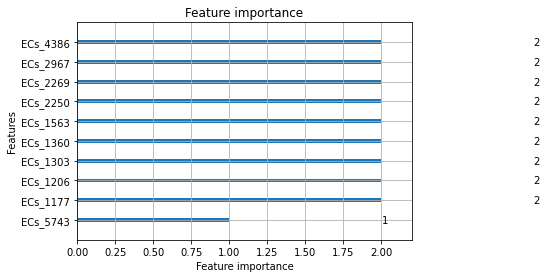

In [70]:
import matplotlib.pyplot as plt
print('Plotting feature importances...')
ax = lgb.plot_importance(clf3, max_num_features=10)
plt.show()

In [71]:
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, roc_auc_score
y3_pred=clf3.predict(X_test)
accuracy=accuracy_score(y3_pred, y_test)


print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y3_pred)))
print('ROC_AUC : {0:0.4f}'.format(roc_auc_score(y_test, y3_pred)))

LightGBM Model accuracy score: 0.9933
ROC_AUC : 0.9942


In [72]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef
cm = confusion_matrix(y_test, y3_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print(classification_report(y_test, y3_pred))
print('- MCC: %s' % matthews_corrcoef(y_test, y3_pred))

Confusion matrix

 [[170   2]
 [  0 127]]

True Positives(TP) =  170

True Negatives(TN) =  127

False Positives(FP) =  2

False Negatives(FN) =  0
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       172
           1       0.98      1.00      0.99       127

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299

- MCC: 0.986432204807715


In [73]:
clf3.booster_.save_model("Model_C.txt")

In [74]:
f=open('list_of_features_model_C.txt','w')
for ele in X.columns:
    f.write(ele+'\n')
f.close()